# 1.환경설정

In [5]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# data dir
import os
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Mypass.py',
 '__pycache__',
 'My_setting.py',
 'test.txt',
 'example.py',
 'My_setting.txt']

## 한글폰트 설치

In [1]:
#한글폰트 설치 :
import matplotlib as mpl
import matplotlib.pyplot as plt

!wget https://github.com/hwanheo97/Dataset/raw/master/NanumGothic.ttf

mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

--2023-07-22 03:46:10--  https://github.com/hwanheo97/Dataset/raw/master/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hwanheo97/Dataset/master/NanumGothic.ttf [following]
--2023-07-22 03:46:11--  https://raw.githubusercontent.com/hwanheo97/Dataset/master/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf’

NanumGothic.ttf     100%[===================>]   4.14M  --.-KB/s    in 0.05s   

2023-07-22 03:46:11 (76.6 MB/s) - ‘NanumGothic.ttf’ saved [4343844/4343844]



###배경그림 및 글체 준비하기

In [168]:
# !wget https://github.com/hwanheo97/Dataset/raw/master/heart.png
# !wget https://github.com/hwanheo97/Dataset/raw/master/NanumMyeongjo.ttf
# !wget https://github.com/hwanheo97/Dataset/raw/master/usa_map.jpg
# !wget https://github.com/hwanheo97/Dataset/raw/master/korea.jpg
# !wget https://github.com/hwanheo97/Dataset/raw/master/world_map.png
!wget https://github.com/hwanheo97/Dataset/raw/master/AI.jpg

--2023-07-22 08:17:09--  https://github.com/hwanheo97/Dataset/raw/master/AI.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hwanheo97/Dataset/master/AI.jpg [following]
--2023-07-22 08:17:09--  https://raw.githubusercontent.com/hwanheo97/Dataset/master/AI.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62146 (61K) [image/jpeg]
Saving to: ‘AI.jpg’

AI.jpg              100%[===================>]  60.69K  --.-KB/s    in 0.008s  

2023-07-22 08:17:09 (7.72 MB/s) - ‘AI.jpg’ saved [62146/62146]



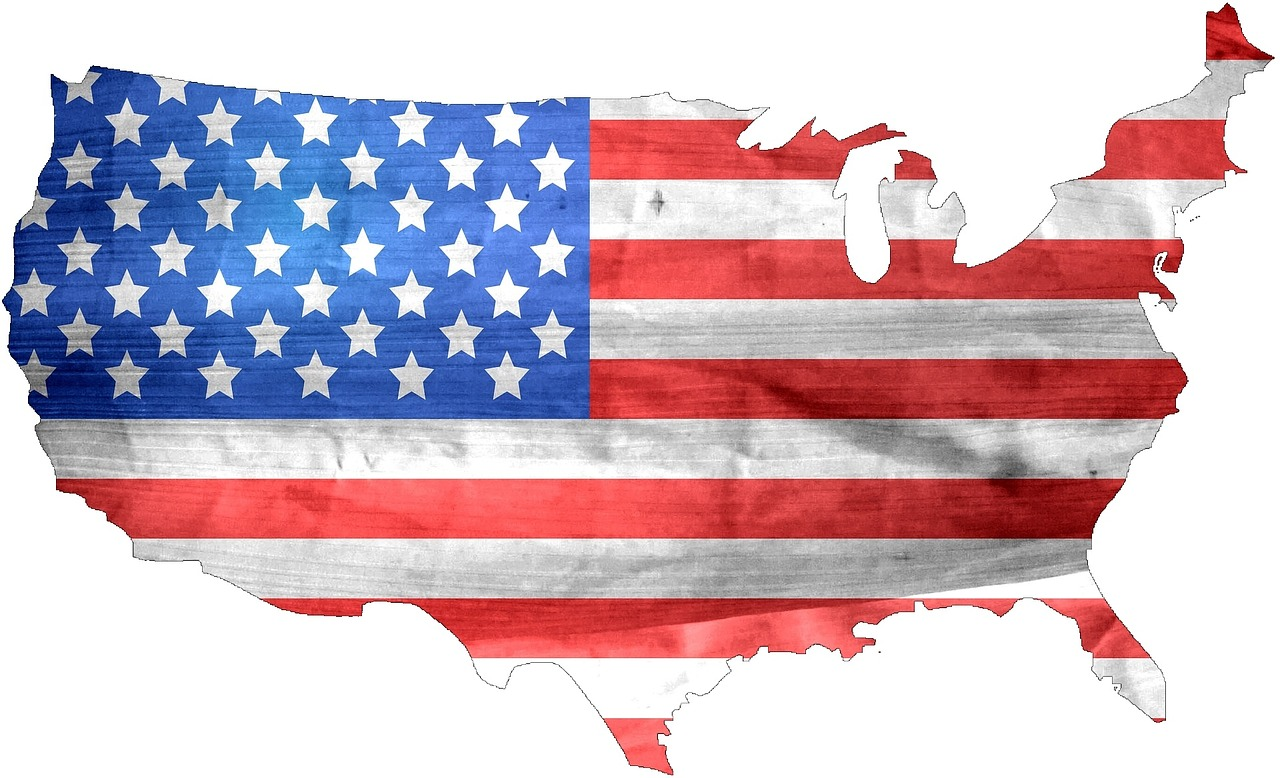

In [ ]:
from IPython.display import Image
Image("usa_map.jpg",width = 120, height = 80 )

# 2.네이버 API 이용한 데이터 수집

참조 : https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8

## 가.네이버 뉴스 JSON 데이터 수집

json 데이터는 urlopen(request).read()는 바로 json.loads() 할 수 있고 이것은 바로 pd.DataFrame으로 정리 가능

In [174]:
from urllib.parse import quote
from urllib.request import Request, urlopen
import json
import pandas as pd

from drive.MyDrive.data.My_setting import my_id,my_pass
#########################키워드 키워드 키워드 키워드 ###################################################################
keyword = quote('SK')
url = 'https://openapi.naver.com/v1/search/news?query=' + keyword+'&display=50'
request = Request(url)
request.add_header('X-Naver-Client-Id', my_id)
request.add_header('X-Naver-Client-Secret',my_pass)
response = urlopen(request).read()
response
items = json.loads(response)['items']    #items json 형태중 items 태그 딕셔너리로 리스트형식으로  key 와 값을 반환
print(items)
df = pd.DataFrame(items)   ##df정의요
col=[0,1,3,4]
top_news = df.iloc[:,col]
top_news


[{'title': '[채용게시판]제주항공·풀무원식품·스킨푸드 등 채용', 'originallink': 'http://www.fnnews.com/news/202307221737094782', 'link': 'https://n.news.naver.com/mnews/article/014/0005045991?sid=101', 'description': '<b>SK</b> TNS와 제주항공, 스킨푸드 등이 인재 확보에 나섰다. 22일 커리어 매칭 플랫폼 사람인에 따르면 <b>SK</b> TNS와 제주항공, 한국오츠카제약, 풀무원식품, 스킨푸드 등이 인턴과 신입, 경력 사원 채용을 진행 중이다. <b>SK</b> TNS는... ', 'pubDate': 'Sat, 22 Jul 2023 17:43:00 +0900'}, {'title': '기름값 2주 연속 상승…휘발유 11.5원·경유 12.8원 ↑', 'originallink': 'https://www.delighti.co.kr/news/articleView.html?idxno=61748', 'link': 'https://www.delighti.co.kr/news/articleView.html?idxno=61748', 'description': '상표별로는 <b>SK</b>에너지 주유소가 1592.1원으로 가장 비쌌고, 알뜰주유소가 1549.3원으로 가장 저렴했다. 경유 판매 가격은 전주보다 12.8원 상승한 1394.9원으로 집계됐다. 이번 주 국제 유가는 미국 주간 석유 재고 감소... ', 'pubDate': 'Sat, 22 Jul 2023 17:36:00 +0900'}, {'title': '<b>SK</b>네트웍스, 엔코아 지분 88.47% 인수...AI 영역 성장 기대', 'originallink': 'http://www.newsbrite.net/news/articleView.html?idxno=174568', 'link': 'http://www.newsbrite.net/news/articleView.html?id

,title,originallink,description,pubDate
0,[채용게시판]제주항공·풀무원식품·스킨푸드 등 채용,http://www.fnnews.com/news/202307221737094782,"<b>SK</b> TNS와 제주항공, 스킨푸드 등이 인재 확보에 나섰다. 22일 커...","Sat, 22 Jul 2023 17:43:00 +0900"
1,기름값 2주 연속 상승…휘발유 11.5원·경유 12.8원 ↑,https://www.delighti.co.kr/news/articleView.ht...,"상표별로는 <b>SK</b>에너지 주유소가 1592.1원으로 가장 비쌌고, 알뜰주유...","Sat, 22 Jul 2023 17:36:00 +0900"
2,"<b>SK</b>네트웍스, 엔코아 지분 88.47% 인수...AI 영역 성장 기대",http://www.newsbrite.net/news/articleView.html...,<b>SK</b>네트웍스가 국내 데이터 관리 시장을 선도해 온 &apos;엔코아&a...,"Sat, 22 Jul 2023 17:32:00 +0900"
3,"김원형 SSG 감독, 하재훈 활약에 빙그레 &quot;이젠 그만 다쳤으면&quot;",https://www.yna.co.kr/view/AKR2023072203880000...,하재훈은 2019년 SSG의 전신인 <b>SK</b> 와이번스에서 36세이브를 올리...,"Sat, 22 Jul 2023 17:25:00 +0900"
4,"추일승 감독 &quot;AG 엔트리, 이미 제출…U대표팀전 패배는 교훈&quot;",http://www.newsis.com/view/?id=NISX20230722_00...,추 감독은 &quot;올림픽 예선이 끝나면 명단을 (최종) 확정할 것 같다&quot...,"Sat, 22 Jul 2023 17:22:00 +0900"
5,"&quot;개미에겐 종교&quot;…939% 폭등 황제주, 믿음으로 더 오른다?",https://www.joongang.co.kr/article/25179308,"올해 들어 시총이 5배나 불어나며 19일 기준 삼성(622조7430억원), LG(2...","Sat, 22 Jul 2023 17:00:00 +0900"
6,"[EBN 오늘(22일) 이슈종합] 韓 2분기 GDP 속보치 나온다, 기름값 2주 연...",https://www.ebn.co.kr/news/view/1585797/?sc=Naver,"상표별로는 <b>SK</b>에너지 주유소가 1592.1원으로 가장 비쌌고, 알뜰주유...","Sat, 22 Jul 2023 16:30:00 +0900"
7,"나스닥 빅7 비중 줄이기로..테슬라와 엔비디아 조정, 삼성전자 등 지지선 방어...",https://idsn.co.kr/news/view/1065596687885660,(사진=연합뉴스) 주말 우리 증시는 삼성전자와 <b>SK</b>하이닉스가 패시브한 ...,"Sat, 22 Jul 2023 16:24:00 +0900"
8,"&apos;허훈 22점&apos; 한국 남자농구, 일본과 평가전 76–69 승리",http://www.newsis.com/view/?id=NISX20230722_00...,"이날 김선형, 오세근(이상 <b>SK</b>), 라건아(KCC)는 컨디션이 좋지 않...","Sat, 22 Jul 2023 16:23:00 +0900"
9,전경련 4대 그룹에 재가입 공식 요청···삼성 결정이 관건,http://www.enewstoday.co.kr/news/articleView.h...,"22일 재계 등에 따르면 전경련은 지난 19일 경영위원회 명의로 삼성전자, <b>S...","Sat, 22 Jul 2023 16:07:00 +0900"


In [23]:
top_news['description'][0]

'3명의 직원이 일본과 <b>싱가포르</b>에 살면서 한국 시간에 맞춰 일합니다. 정규 근무 시간은 오전 8~10시 사이에 시작해 점심시간 포함 9시간 일하면 됩니다. 과연 이 업체 직원들은 재택근무를 어떻게 하는지 궁금해 인사업무를... '

In [152]:
top_news['originallink'][12]

'https://www.ziksir.com/news/articleView.html?idxno=39903'

###1)텍스트 전처리 :
#### description을 모두 합쳐 말뭉치 만들고 콤마로 연결하고 한글이 아닌 것과 공백 없애기

In [175]:
# 텍스트 전처리 : description을 모두 합친 말뭉치 만들고 콤마로 연결하고 한글이 아닌 것 과 공백 없애기
import re
corpus = df['description']    # DataFrame 기능 :요약 컬럼을 하나로 합치기
corpus
con_text = ",".join(corpus)
con_text
print(len(con_text))
text = re.sub('[^가-힣|^ |]', '',con_text)
text

7232


' 와 제주항공 스킨푸드 등이 인재 확보에 나섰다 일 커리어 매칭 플랫폼 사람인에 따르면  와 제주항공 한국오츠카제약 풀무원식품 스킨푸드 등이 인턴과 신입 경력 사원 채용을 진행 중이다  는 상표별로는 에너지 주유소가 원으로 가장 비쌌고 알뜰주유소가 원으로 가장 저렴했다 경유 판매 가격은 전주보다 원 상승한 원으로 집계됐다 이번 주 국제 유가는 미국 주간 석유 재고 감소 네트웍스가 국내 데이터 관리 시장을 선도해 온 엔코아를 인수키로 했다 이를 통해 고객 서비스의 네트웍스대표이사 이호정는 일 이사회를 열어 주엔코아의 지분 를 억 천만원에 인수하는 안건을 하재훈은 년 의 전신인  와이번스에서 세이브를 올리며 세이브왕을 차지했지만 이후 잦은 부상으로 롱런하지 못했다 김원형 감독이 부임한 시즌에도 그랬다 하재훈은 시즌을 앞두고 오른쪽 어깨 추 감독은 올림픽 예선이 끝나면 명단을 최종 확정할 것 같다며 오늘 경기에서 뛰지 못한 김선형 오세근이상  라건아가 계획대로 몸을 만든다면 문제가 없지만 그렇지 않다면 바꿔줘야 한다고 생각한다고 올해 들어 시총이 배나 불어나며 일 기준 삼성조억원 조억원 조억원 현대차 에코프로와 에코프로비엠을 비롯해 에너지솔루션이노베이션화학포스코퓨처엠포스코홀딩스 상표별로는 에너지 주유소가 원으로 가장 비쌌고 알뜰주유소가 원으로 가장 저렴한 것으로 나타났다 이번 주 국제 유가는 미국 주간 석유 재고 감소 중국의 월 원유 수입 급증 영국의 통화 긴축 완화 사진연합뉴스 주말 우리 증시는 삼성전자와 하이닉스가 패시브한 외국인 매도에 조정을 이어갔지만 홀딩스와 포스코퓨처엠이 급등세를 보여 큰 관심을 모았고 에코프로와 에코프로비엠도 상승하며 코스닥의 이날 김선형 오세근이상  라건아는 컨디션이 좋지 않아 코트에 서지 않았다 일본은 초반  단신 가드 토가시 유키점의 점포로 기선 제압에 나섰다 경기 시작과 함께 연속으로 개를 꽂았다 한국은 일 재계 등에 따르면 전경련은 지난 일 경영위원회 명의로 삼성전자 그룹 현대자동차그룹 그룹 등 현재 한경연 회원사로 있는 대 

### 2)한글 형태소 분석기 설치

In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.1 MB/s eta 0:00:00


###3)분석시 필요없는 불용어 제거하기

In [176]:
#korea_stopwords.txt를 다운로드해서 로칼pd에 저장
stopwords =pd.read_csv("https://raw.githubusercontent.com/hwanheo97/Dataset/master/korean_stopwords.txt").values.tolist()
# 다운로드 자료 구글드라이브에 백업
# df.to_csv(os.path.join(data_dir, 'korean_stopwords.txt'), index=False)
# df[:10]
# stopword =df[:]
# stopwords[:10]

# 형태 조정, 특별한 용어 추가, 불용어 추가하여 분석할 망뭉치에서 제거하기
stopwords=[x[0]  for x in stopwords]
stopwords[:10]
for word in stopwords :
  if word =='한국':
    print('yes')
#stopwords 추가 , 제주 호텔 리뷰를 자료로 하니 제주, 제주도 호텔 등의 단어가 많을 수 밖에 없어 제저처리
keyword_stopwords = ['오대산', '관광']
for word in keyword_stopwords:
    stopwords.append(word)
print(stopwords)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

#### 4) 형태소분석기 이용하여 명사, 한글자 이상, 불용어 처리하고 워드 빈도수 이용 wordcloud 그리기

(-0.5, 1199.5, 1096.5, -0.5)

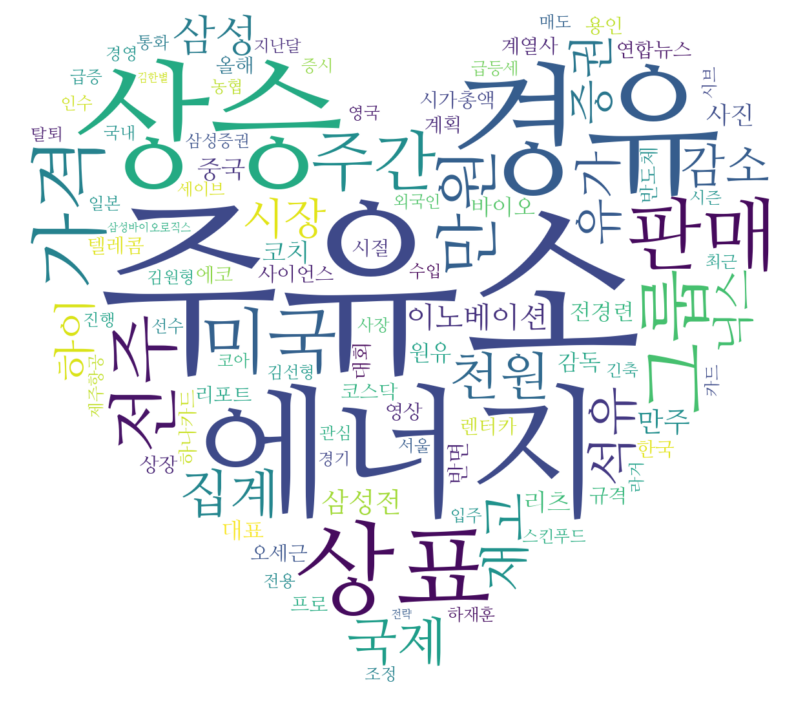

In [177]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text

#분석시 필요앖는 단어 없애기
para = re.sub('[투자|투자자|산업]', '',para)

# 2. 한글 형태소 분석하기, 명사만 추출
tag = Komoran()
nouns = tag.nouns(para)
nouns = [n for n in nouns if len(n) > 1]   #한글자 이상되는 명사 사용
type(nouns)
nouns = [x for x in nouns if x not in stopwords] # 불용어 제거

# 3. 단어 숫자 세기
count = Counter(nouns)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


### 워드 카운터 & 빈도수 시각화

In [178]:
# 워드카운트
from collections import Counter
nouns = [n for n in nouns if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count = Counter(nouns)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top1 = count.most_common(10)
print(top1)

[('주유소', 30), ('에너지', 15), ('경유', 15), ('상승', 15), ('상표', 13), ('판매', 13), ('가격', 13), ('그룹', 12), ('전주', 11), ('미국', 11)]


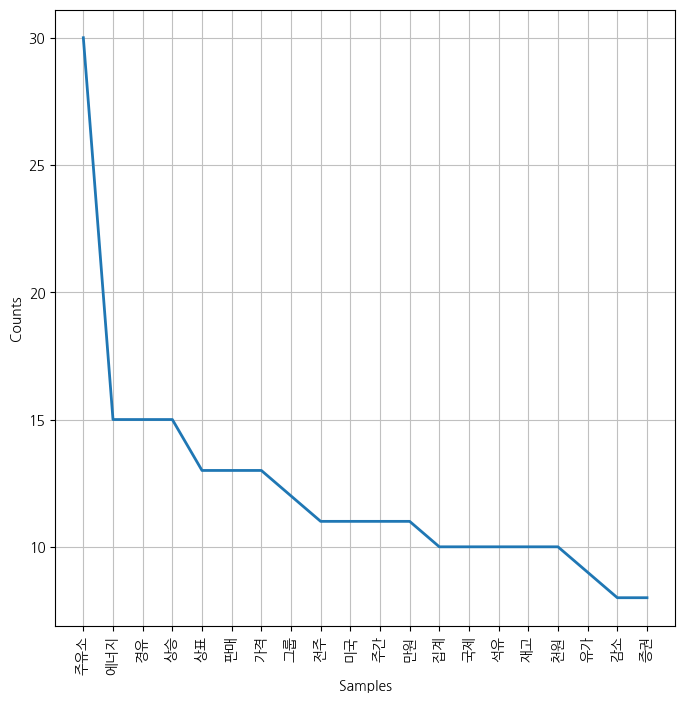

<Axes: xlabel='Samples', ylabel='Counts'>

In [179]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

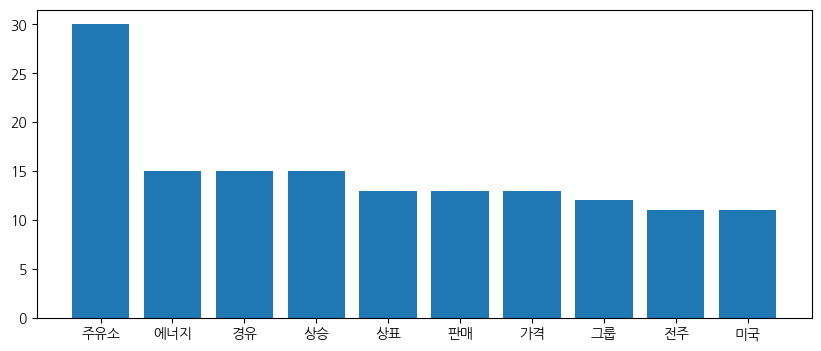

In [180]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 나. 네이버 백과사전 XML 데이터수집

In [124]:
import os
import sys
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

keyword = urllib.parse.quote("4차산업혁명")
#url = "https://openapi.naver.com/v1/search/blog?query=" + keyword # json 결과
url = "https://openapi.naver.com/v1/search/encyc.xml?query=" + keyword +'&display=30'  # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)
soup = BeautifulSoup(response,'html.parser')  # xml 문서도 html과 동일하게 html.parser 이용
# print(soup.prettify())
data = soup.find_all('item')  # item tag를 찾아서 리스트 형태로 제공
print(data[:1])
rows = []
for item in data:
    title = item.find("title").get_text()
    link = item.find("link")   #.get_text()
    description= item.find("description").get_text()

    title = re.sub('[^가-힣,.]', ' ',title)     #title을 정리하기  ^가-힣  까지 한글이 아닌 것으 공백으로 대체 하는 함수 sub()
    link= link #re.sub('[^가-힣,.]', ' ',link)
    description = re.sub('[^가-힣,.]', ' ',description)
    rows.append({"제목": title,
                 "요약": description,
                 "링크": link})

df = pd.DataFrame(rows)
df

# col=[0,1,2]
# top_news = df.iloc[:,col]
# top_news

[<item><title>&lt;b&gt;4차 산업혁명&lt;/b&gt;</title><link/>https://terms.naver.com/entry.naver?docId=3377297&amp;cid=43667&amp;categoryId=43667<description> 정보통신기술(ICT)의 융합으로 이뤄지는 차세대 &lt;b&gt;산업혁명&lt;/b&gt;으로, '초연결', '초지능', '초융합'으로 대표된다.  | 외국어 표기 | Fourth Industrial Revolution(영어) 四次 産業革命(한자) | 인공지능(AI)... </description><thumbnail>https://dthumb-phinf.pstatic.net/?src=%22https%3A%2F%2Fpost-phinf.pstatic.net%2FMjAxODExMjZfMTY2%2FMDAxNTQzMjMxNDEwOTIy.Q2g8_n17pSAX9V-e7P3PuA6zVpFWH2ku784fPII4V8cg.5k7jr11uhFcJaKDt8P8aDcPCwXguVk2scoR-llDn-okg.JPEG%2FIGbtZWQtKRdPklnriirA7uqd3yG4.jpg%3Ftype%3Dm4500_4500_fst%22&amp;type=w540#540x502#c502</thumbnail></item>]


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,제목,요약,링크
0,차 산업혁명,"정보통신기술 의 융합으로 이뤄지는 차세대 산업혁명 으로, 초연...",[]
1,제 차 산업혁명,제 차 산업혁명 은 초연결 과 초지능 ...,[]
2,차 산업혁명 을 맞으며,"년을 시작하며 세계경제포럼 , 은...",[]
3,차 산업혁명,차 산업혁명 은 온라인 정보통신 기술이 오프라인 산업 현장...,[]
4,차 산업혁명,제 차 산업혁명 이라고 불렀다. 이전까지의 공장자동화는 미리 입력된 프로...,[]
5,차산업혁명,"차 산업혁명 은 물리세계, 디지털세계, 그리고 생물 세계가 융합되어,...",[]
6,차 산업혁명,"차 산업혁명 이란 인공지능기술 및 사물인터넷, 빅데이터 등 정보통신기술...",[]
7,차 산업혁명,차 산업혁명 은 차 산업혁명 을 다룬 책이다. 전 세계...,[]
8,차 산업혁명,,[]
9,차산업혁명,,[]


In [ ]:
df['요약'][0]

In [ ]:
df['링크'][1]

<link/>

In [125]:
# 텍스트 전처리
import re
paras = df['요약']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text2 = re.sub('[^가-힣|^ |^|]', '',con_text)
text2

3420


' 정보통신기술     의 융합으로 이뤄지는 차세대    산업혁명    으로  초연결   초지능   초융합 으로 대표된다    외국어 표기                                영어          한자    인공지능     제    차 산업혁명    은 초연결                   과 초지능                   을 특징으로 하기 때문에 기존    산업혁명    에 비해 더 넓은 범위       에 더 빠른 속도          로 크게 영향        을 끼친다  제    차         년을 시작하며 세계경제포럼                          은 향후 세계가 직면할 화두로      차 산업혁명     을 던졌다그 이후     차 산업혁명    이 유행어처럼 회자되었고 많은 논의가 이루어지기 시작했다더욱이     차 산업혁명    은 온라인 정보통신 기술이 오프라인    산업     현장에 적용되면서 일어난 혁신을 일컫는 말이다    가 오프라인 제조공장에 적용되면서 생산 영역에서 질적 상승이 일어났다생산 공정을 손쉽게 제    차 산업혁명    이라고 불렀다 이전까지의 공장자동화는 미리 입력된 프로그램에 따라 생산시설이 수동적으로 움직이는 것을 의미했다 하지만     차 산업혁명    에서 생산설비는 제품과 상황에 따라      차 산업혁명    은 물리세계 디지털세계 그리고 생물 세계가 융합되어 경제와 사회의 모든 영역에 영향을 미치게 하는 새로운    산업    시대를 말한다      차 산업혁명    은 물리세계 디지털세계 그리고 생물     차 산업혁명    이란 인공지능기술 및 사물인터넷 빅데이터 등 정보통신기술     과의 융합을 통해 생산성이 급격히 향상되고 제품과 서비스가 지능화되면서 경제 사회 전반에 혁신적인 변화가 나타나는      차 산업혁명     은     차 산업혁명    을 다룬 책이다 전 세계가     차 산업혁명     준비에 여념이 없다  지능 과  연결 을 키워드로

(-0.5, 399.5, 577.5, -0.5)

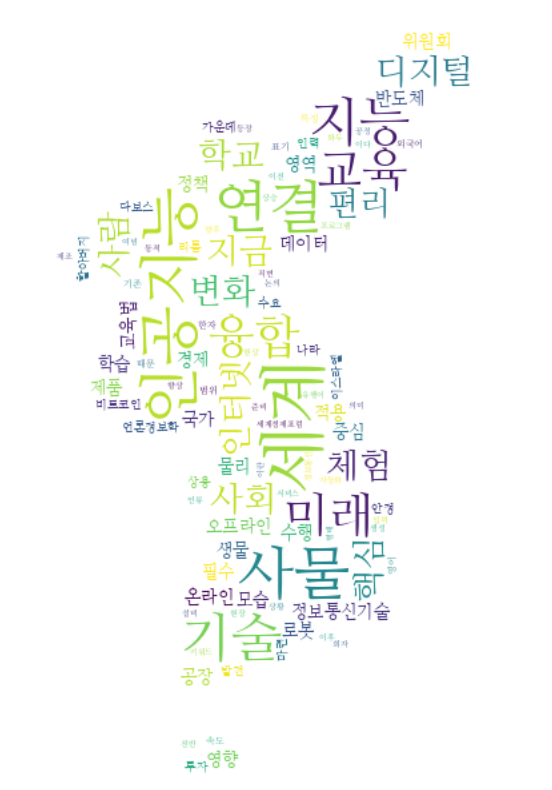

In [165]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text2

para = re.sub('[혁명|분석|시대|산업]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns1 = tag.nouns(para)
nouns1 = [n for n in nouns1 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns1 = [x for x in nouns1 if x not in stopwords] # 불용어 제거

# 3. 단어 숫자 세기
count = Counter(nouns1)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('korea.jpg').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [127]:
# 워드카운트
from collections import Counter
nouns1 = [n for n in nouns1 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count1 = Counter(nouns1)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top2 = count1.most_common(10)
print(top2)

[('세계', 9), ('인공지능', 7), ('연결', 6), ('사물', 6), ('지능', 5), ('기술', 5), ('융합', 4), ('미래', 4), ('교육', 4), ('디지털', 3)]


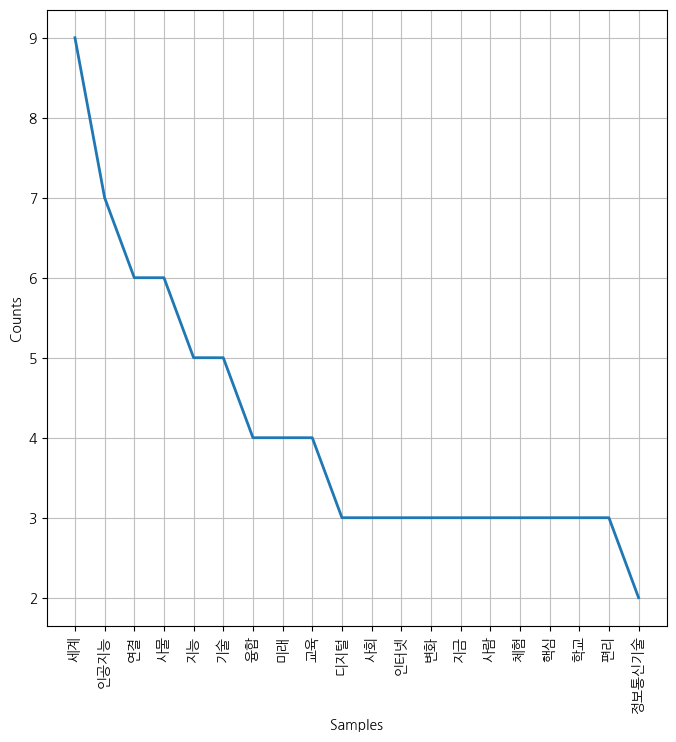

<Axes: xlabel='Samples', ylabel='Counts'>

In [128]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns1)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

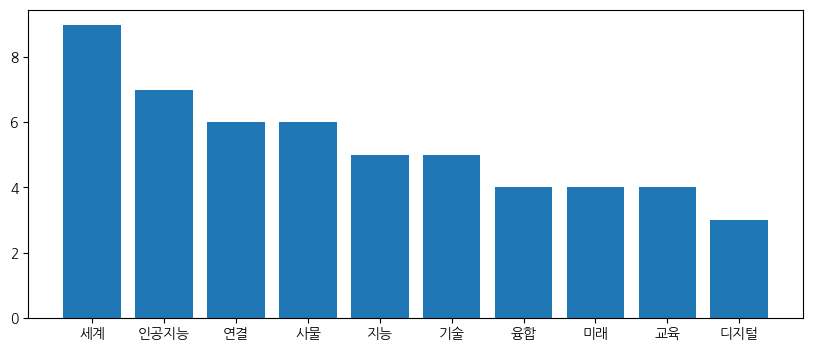

In [129]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 다. 네이버 블로그 JSON 데이터수집

In [92]:
# 참고 코드 : 네이버 영화 조회
import re
import pandas as pd
import json
import urllib.request


# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request

from drive.MyDrive.data.My_setting import my_id,my_pass
encText = urllib.parse.quote("빅데이터")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)


response_body = response.read()
info = response_body.decode('utf-8')
data = json.loads(info)['items']
print(data)
df = pd.DataFrame(data)
col=[0,5,6,4,7]
# df.iloc[:,col]
df

# rescode = response.getcode()
# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)





[{'title': '[도서] 상위 1%의 커리어 비밀노트 특허 <b>빅데이터</b>_송완감 외', 'link': 'https://blog.naver.com/deviliana/223153557597', 'description': '데이터 뽑기 바쁜데 이건 왜 들어야 하는거지? 하는 생각을 수업을 들을때 하고 있었던 것 같기도 하다.... 1부는 특허와 <b>빅데이터</b>의 개요며 이들을 분석하는 게 왜 필요한지의 당위성을 설명하는 파트이고, 2... ', 'bloggername': 'Totipotency.', 'bloggerlink': 'blog.naver.com/deviliana', 'postdate': '20230712'}, {'title': '<b>빅데이터</b>전문가 자격증 합격후기 알려드려요', 'link': 'https://blog.naver.com/ejlove0002/223147638970', 'description': '처음에 이 분야에서 꼭 알아야 하는 데이터와 정보, 데이터베이스에 대해 배워요. 그리고 <b>빅데이터</b>에 대한 이해를 진행합니다. 교수님께서 쉽게 풀어서 설명해 주시니까 처음이어도 어렵지 않았어요. 그리고... ', 'bloggername': 'daily~', 'bloggerlink': 'blog.naver.com/ejlove0002', 'postdate': '20230705'}, {'title': '<b>빅데이터</b>분석기사 필기 및 실기 합격 후기 (2023년 1회차... ', 'link': 'https://blog.naver.com/haen0202/223154726628', 'description': '실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 <b>빅데이터</b>분석기사 필기 책/실기 책 추천 내가 구매한 2권의 교재들. 필기 교재 이전에 ADsP 공부할 때 썼던 데이터에듀 책으로 골랐다. 사실... ', 'bloggername': 'Always keep learning', 'bloggerl

,title,link,description,bloggername,bloggerlink,postdate
0,[도서] 상위 1%의 커리어 비밀노트 특허 <b>빅데이터</b>_송완감 외,https://blog.naver.com/deviliana/223153557597,데이터 뽑기 바쁜데 이건 왜 들어야 하는거지? 하는 생각을 수업을 들을때 하고 있었...,Totipotency.,blog.naver.com/deviliana,20230712
1,<b>빅데이터</b>전문가 자격증 합격후기 알려드려요,https://blog.naver.com/ejlove0002/223147638970,"처음에 이 분야에서 꼭 알아야 하는 데이터와 정보, 데이터베이스에 대해 배워요. 그...",daily~,blog.naver.com/ejlove0002,20230705
2,<b>빅데이터</b>분석기사 필기 및 실기 합격 후기 (2023년 1회차...,https://blog.naver.com/haen0202/223154726628,실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 <b>빅데이터</...,Always keep learning,blog.naver.com/haen0202,20230713
3,대구컴퓨터학원 <b>빅데이터</b> 분석 과정 꼼꼼한 학습,https://blog.naver.com/rame83/222961743303,"시험 과목은 <b>빅데이터</b> 분석 기획(<b>빅데이터</b>의 이해, 데이터 ...",임엄마의 얼렁뚱땅 주부놀이,blog.naver.com/rame83,20221221
4,<b>빅데이터</b>와 클라우드의 날개를 달다 : 머신비전,https://blog.naver.com/with_msip/223151925611,그런데 이 '국가 바이오 <b>빅데이터</b> 구축 사업' 덕분에 연구자들은 국외의...,과학기술정보통신부 블로그,blog.naver.com/with_msip,20230711
5,부산코딩학원 웹 앱개발자 <b>빅데이터</b> 국비지원(서면역),https://blog.naver.com/qislvie/223141972765,부산<b>빅데이터</b>학원 데이터분석 기술 배우기 부산<b>빅데이터</b>학원에서...,난 할 수 있다,blog.naver.com/qislvie,20230629
6,국취제 <b>빅데이터</b>전문가양성과정 아이티윌 강남 유연수 강사님...,https://blog.naver.com/dinnernin/223138604774,sqlp까지 공부하는 동기들도 있다 정말 어렵지만 그만큼 가치 있는 시험이니까 다음...,dinnernin’ playlist,blog.naver.com/dinnernin,20230626
7,개판 일보직전 <b>빅데이터</b> 업체의 거짓말? 부동산 정보.,https://blog.naver.com/goldq2/223145485690,"최근에 부동산 정보에 관심이 많아서, 이런 저런 <b>빅데이터</b> 업체의 부동산...",Atlas&apos; fishing n tour,blog.naver.com/goldq2,20230703
8,<b>빅데이터</b> 분석기사 노베이스 비전공자 필기/실기 초수합격...,https://blog.naver.com/sswan85/223162645031,나는 <b>빅데이터</b> 분석기사를 7월 14일 부로 취득하였다. 필기는 제 5회...,종이배 Blog,blog.naver.com/sswan85,20230721
9,<b>빅데이터</b>분석기사 응시자격 확인 및 학습과정,https://blog.naver.com/mintsorbet07/223065739909,한국데이터산업진흥원이 시행하기로 2021년도에 첫 시험이 진행되었죠. IT업계 중에...,song&apos;s eyagi,blog.naver.com/mintsorbet07,20230406


In [98]:
# 텍스트 전처리
import re
paras = df['description']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text3 = re.sub('[^가-힣|^ |^|]', '',con_text)
text3

1280


'데이터 뽑기 바쁜데 이건 왜 들어야 하는거지 하는 생각을 수업을 들을때 하고 있었던 것 같기도 하다 부는 특허와 빅데이터의 개요며 이들을 분석하는 게 왜 필요한지의 당위성을 설명하는 파트이고  처음에 이 분야에서 꼭 알아야 하는 데이터와 정보 데이터베이스에 대해 배워요 그리고 빅데이터에 대한 이해를 진행합니다 교수님께서 쉽게 풀어서 설명해 주시니까 처음이어도 어렵지 않았어요 그리고 실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 빅데이터분석기사 필기 책실기 책 추천 내가 구매한 권의 교재들 필기 교재 이전에  공부할 때 썼던 데이터에듀 책으로 골랐다 사실 시험 과목은 빅데이터 분석 기획빅데이터의 이해 데이터 분석 계획 데이터 수집 및 저장 계획 빅데이터 탐색데이터 전처리 탐색 통계기법 이해 빅데이터 모델링분석 모형 설계 분석 기법 적용 그런데 이 국가 바이오 빅데이터 구축 사업 덕분에 연구자들은 국외의 데이터가 아닌 한국형 바이오 빅데이터를 원스톱으로 제공받을 수 있게 되었고 더욱 수월하게 관련 연구를 진행해  의료영상기기에 부산빅데이터학원 데이터분석 기술 배우기 부산빅데이터학원에서 데이터분석 기술을 배우기 위해서는 우선순위는 다양한 프로그래밍언어에 대한 학습이 있어야 합니다 보통 파이썬   명령어를 많이 까지 공부하는 동기들도 있다 정말 어렵지만 그만큼 가치 있는 시험이니까 다음으로는  데이터분석 준전문가 자격증도 트에 패스 저 중간에 빅데이터 분석기사도 있었는데 시간이 안맞아서 나는 최근에 부동산 정보에 관심이 많아서 이런 저런 빅데이터 업체의 부동산 정보를 보고 있는데요  정말 실망스럽고 정말 무섭네요 제가 주로 보는 것은 국토부 실거래가 일종의 로데이터 아실 리치고 나는 빅데이터 분석기사를 월 일 부로 취득하였다 필기는 제 회 시험에 합격하였고 실기는 제 회 그리고 데이터프레임에서 원하는 데이터를 추출하는 슬라이싱 능력이 제일 기본이다 결측치 이상치 한국데이터산업진흥원이 시행하기로 년도에 첫 시험이 진행되었죠 업계 중에서도 빅데이터 

(-0.5, 542.5, 511.5, -0.5)

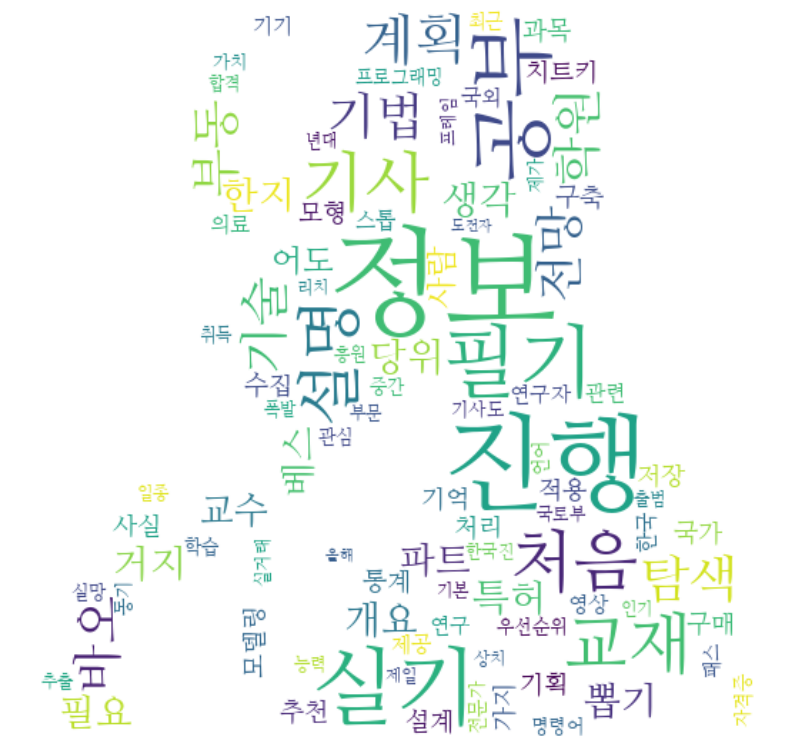

In [172]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text3

para = re.sub('[데이터|분석|시대|산업]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns2 = tag.nouns(para)
nouns2 = [n for n in nouns2 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns2 = [x for x in nouns2 if x not in stopwords] # 불용어 제거
# 3. 단어 숫자 세기
count2 = Counter(nouns2)
tags = count2.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('AI.jpg').convert("RGBA")
mask = Image.new("RGB", icon.size, (200,200,200))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [100]:
# 워드카운트
from collections import Counter
nouns2 = [n for n in nouns2 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count2 = Counter(nouns2)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top3 = count2.most_common(10)
print(top3)

[('정보', 3), ('진행', 3), ('실기', 3), ('공부', 3), ('필기', 3), ('설명', 2), ('처음', 2), ('기사', 2), ('교재', 2), ('계획', 2)]


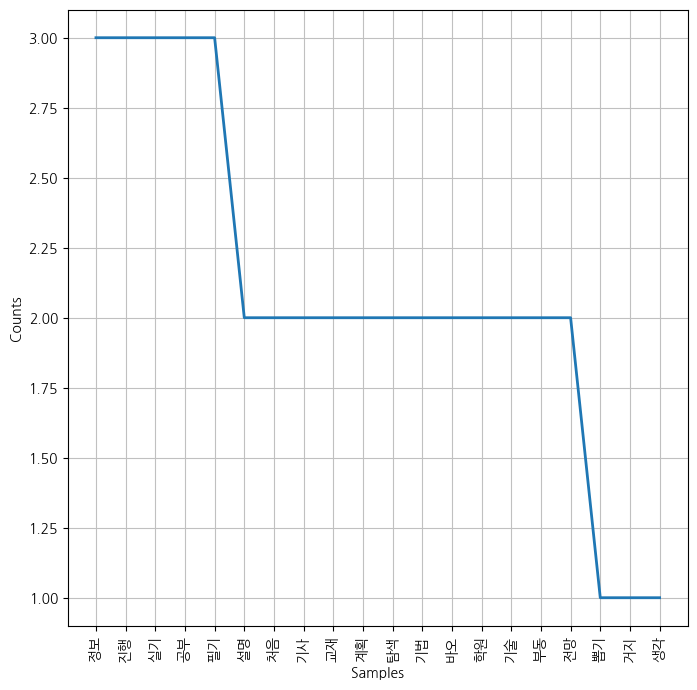

<Axes: xlabel='Samples', ylabel='Counts'>

In [101]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns2)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

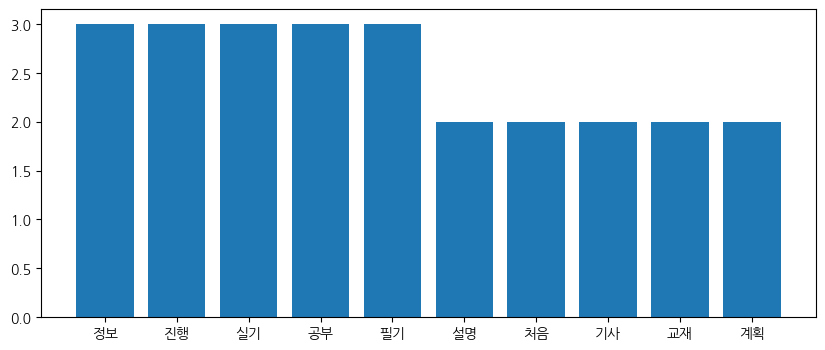

In [105]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 라. 네이버 블로그 XML 데이터수집

In [106]:
# 참고코드 : 강남역 맛집
import re
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup


from drive.MyDrive.data.My_setting import my_id,my_pass
encText = urllib.parse.quote("인공지능")
#url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)

soup = BeautifulSoup(response,'xml') # 기존 코드 html.parser를 warning 제거를 위해 변경
data = soup.find_all('item')
print(data[:1])
rows = []
for item in data:
    title = item.find("title").get_text()
    #link = item.find("link").get_text()
    description= item.find("description").get_text()

    title = re.sub('[^가-힣,.]', ' ',title)     #title을 정리하기  ^가-힣  까지 한글이 아닌 것으 공백으로 대체 하는 함수 sub()
    # link=re.sub('[^가-힣,.]', ' ',link)
    description = re.sub('[^가-힣,.]', ' ',description)
    rows.append({"제목": title,
                 "요약": description})

df = pd.DataFrame(rows)
df

[<item><title>&lt;b&gt;인공지능&lt;/b&gt;에 기반한 신약개발 관련 기업들에 대한 생각</title><link>https://blog.naver.com/hardark/223155189732</link><description>이 글에서는 그동안 단편적으로 언급했던 &lt;b&gt;인공지능&lt;/b&gt;에 기반한 신약개발 바이오 기업들에 대한 생각을... 리커전 파마슈티컬스는 보도자료를 통해 엔비디아 클라우드 서비스를 사용해 &lt;b&gt;인공지능&lt;/b&gt; 기반 모델의... </description><bloggername>경제적 여유만큼 정신적 여유를</bloggername><bloggerlink>blog.naver.com/hardark</bloggerlink><postdate>20230713</postdate></item>]


,제목,요약
0,인공지능 에 기반한 신약개발 관련 기업들에 대한 생각,이 글에서는 그동안 단편적으로 언급했던 인공지능 에 기반한 신약개발 바이...
1,챗 와 이야기하다 인공지능 전문가가 알려주는 챗 로...,"오픈 는 년에 설립된 인공지능 연구 기업이었는데, 구글이나 ..."
2,아이큐코인 전망 및 시세와 인공지능 관련 특징,와 같은 인공지능 플랫폼은 최대한 많은 데이터 학습이 필요...
3,인공지능 이 인간의 일자리를 감소시킬 것인가,인공지능 이 인간의 일자리를 대체 이 질문은 최근에 사람들의 관심을 끌...
4,워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법,워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법입니다. 이 제품은...
5,스마트테크코리아에서 본 이스트소프트의 인공지능 기술들,이유는 이 이스트소프트 사장님이 뛰어난 인공지능 기술을 꾸준히 연구 개...
6,인공지능 기술력 엿볼 수 있는 . 에이닷 어플 챗 ...,필자가 초등학교를 다니던 시절에는 인공지능 라는 단어는 영화...
7,인공지능 교육 미래 경쟁력 키우기,"기본적으로 디지털 콘텐츠를 비롯하여 빅데이터, 인공지능 , 메타버스, 클..."
8,"구글 바드의 확장, 인공지능 으로 유튜브,지도,항공권을 한번에","구글 바드의 확장, 인공지능 으로 유튜브,지도,항공권을 한번에 안녕하세요..."
9,빙 챗 쓰려면 엣지 브라우저로 너만 몰라 인공지능 팁,너만 몰라 인공지능 팁 엔돌슨 . . . 빙 챗 ...


In [107]:
# 텍스트 전처리
import re
paras = df['요약']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text4 = re.sub('[^가-힣|^ |^|]', '',con_text)
text4

1312


'이 글에서는 그동안 단편적으로 언급했던    인공지능    에 기반한 신약개발 바이오 기업들에 대한 생각을 리커전 파마슈티컬스는 보도자료를 통해 엔비디아 클라우드 서비스를 사용해    인공지능     기반 모델의 오픈   는     년에 설립된    인공지능     연구 기업이었는데 구글이나 페이스북 같은 거대한 테크 기업이 재미있었던 것은 챗   로 단편소설 쓰기에서 간단한 주인공을 설명하면서 단편소설을 써달라고 하자 제법        와 같은    인공지능     플랫폼은 최대한 많은 데이터 학습이 필요하고 데이터를 제공하는 프로젝트인 그리고    인공지능    에 블록체인 비즈니스까지 결합됐다는 점에서 아이큐코인 전망은    인공지능    의 재료    인공지능    이 인간의 일자리를 대체  이 질문은 최근에 사람들의 관심을 끌며 치열한 논쟁을 일으키고 감성지능 수준이 부족하다고 주장합니다 일부 낙관론자들은   가 특정 역할에서 인간의 능력을   워시타워 오브제컬렉션    인공지능     세탁모드 작동 방법입니다 이 제품은 올해  월에 결제해서  월에 신축 아파트인 우리 집에 설치했답니다 우리집 다용도실에 설치한 모습입니다    인공지능     세탁모드는 이유는 이 이스트소프트 사장님이 뛰어난    인공지능     기술을 꾸준히 연구 개발하고 있었더라고요 제가 실제로 셔터스톡은    인공지능    이 학습한 데이터 또는 원재료의 사진을 촬영한 원저작권자에게   가 만든 필자가 초등학교를 다니던 시절에는       인공지능     라는 단어는    영화나 과학 책 같은 곳에서만 대표적인 예로 자율주행 차량    인공지능     개인 비서 프로그램 시리 구글 어시스턴트 알렉사 코타나  기본적으로 디지털 콘텐츠를 비롯하여 빅데이터    인공지능     메타버스 클라우드 지능형 로봇 등 여러 과정으로 세분화 된 커리큘럼을 진행하고 있는데요 파이썬을 활용한 딥러닝 텐서 플로우 활용 인프라 구글 바드의 확장    인공지능    으로 유튜브지도항공권을 한번에 안녕

(-0.5, 1199.5, 1096.5, -0.5)

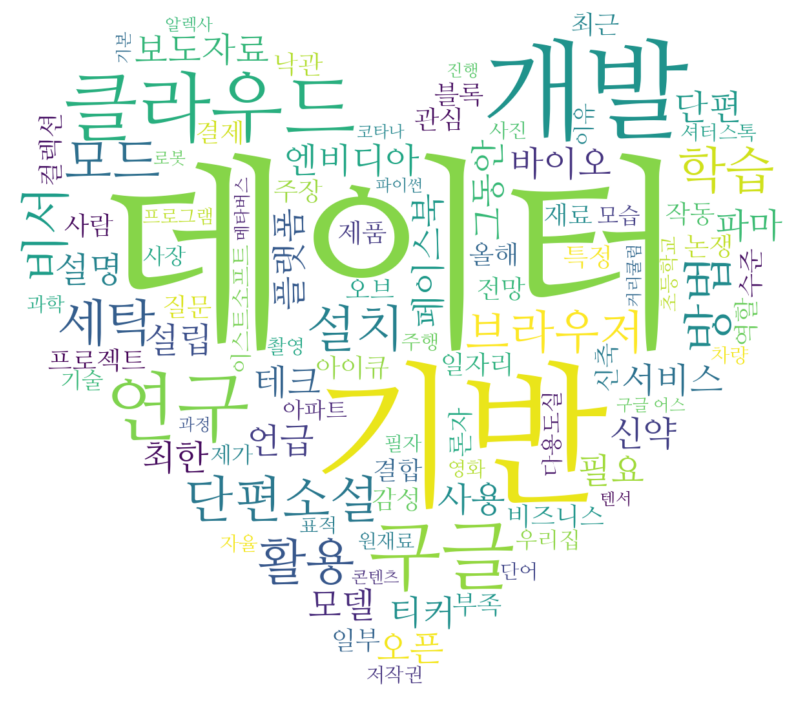

In [109]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text4

para = re.sub('[인공지능|분석|시대|산업|생각]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns3 = tag.nouns(para)
nouns3 = [n for n in nouns3 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns3 = [x for x in nouns3 if x not in stopwords] # 불용어 제거
# 3. 단어 숫자 세기
count = Counter(nouns3)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [111]:
# 워드카운트
from collections import Counter
nouns3 = [n for n in nouns3 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count3 = Counter(nouns3)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top4 = count3.most_common(10)
print(top4)

[('데이터', 4), ('기반', 2), ('개발', 2), ('클라우드', 2), ('연구', 2), ('구글', 2), ('단편소설', 2), ('학습', 2), ('세탁', 2), ('모드', 2)]


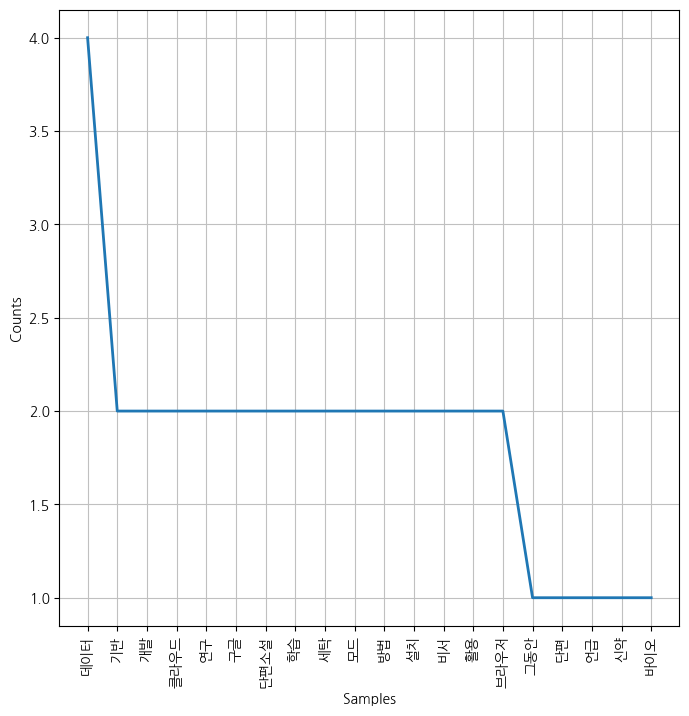

<Axes: xlabel='Samples', ylabel='Counts'>

In [112]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns3)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

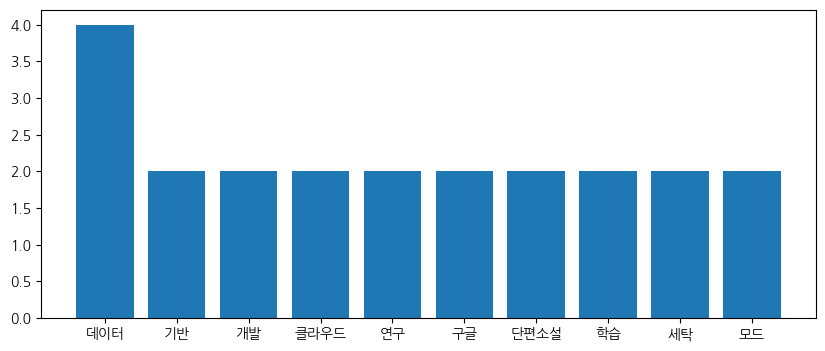

In [113]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

# 3.공공데이터 포털 API 이용한 데이터 수집

공공데이터포털 참조 : https://www.data.go.kr/

코로나 19감염현황 자료 : https://www.data.go.kr/data/15098780/openapi.do

requests.get(url) 데이터는 BS으로 파싱하여 soup.find_all()로 태그를 찾아들어가서 for문으로 정리한다

In [ ]:
# 보건복지부 코로나 19 감염현황 :
# 영상 촬영시 검색 가능항목이 변경되어서 코드가 수정되었습니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup
my_key = '7qt0z4%2FdM2V7wmp35j31S4ong1gY4FFNRLTW0ygAlDFXcTwehDpF4Vco5bd%2BI8TDJvnlWUlwUuDCXlExobA0QQ%3D%3D'
#my_key='QQbPywnt6MGpqLw8dt1NMRC8kBMnWy%2Bd%2FFDsw4AzSRnuRwzKzg%2BNTTsgP9OERV3wVFiepoiX%2B1T1c4ckezqn5w%3D%3D'
params = '&pageNo=1&numOfRows=10&startCreateDt=20230101&endCreateDt=20230321'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey='+my_key+params
res = requests.get(url)
soup = BeautifulSoup(res.content,'html.parser')  # xml 문서도 html과 동일하게 html.parser 이용

data = soup.find_all('item')  # item tag를 찾아서 리스트 형태로 제공
# print(data)
#print(soup.prettify()[:1000])
rows = []
for i, item in enumerate(data):
    n_stateDt = item.find("statedt").get_text()
    n_decideCnt = item.find("decidecnt").get_text()
    # n_clearCnt= item.find("clearcnt").get_text()
    n_deathCnt = item.find("deathcnt").get_text()
    # n_accexamCnt = item.find("accexamcnt").get_text()
    # n_accDefRate = item.find("accdefrate").get_text()
    if i>5:
      break
    if i == 0:
      new_decideCnt = '-'
    else :
      new_decidCnt = 0
      new_decideCnt = int(new_decideCnt)-int(n_decideCnt)
    rows.append({"기준일": n_stateDt,
                 "확진자수": n_decideCnt,
                #  "추가 확진자수": new_decideCnt,
                #  "격리해제수": n_clearCnt,
                #  "검사진행수": n_examCnt,
                 "사망자수": n_deathCnt,
                #  "누적의심검사수": n_accexamCnt,
                #  "누적확진률" : n_accDefRate
                 })

    new_decideCnt = n_decideCnt

# convert XML data to pandas DataFrame
df = pd.DataFrame(rows)
df.head()
# print(url)

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,기준일,확진자수,사망자수
0,20230321,30714691,34178
1,20230320,30702678,34171
2,20230318,30689952,34159
3,20230317,30680964,34155
4,20230315,30661967,34131


4.트위터 API를 이용한 데이터 수집

tweepy 라이브러리 https://docs.tweepy.org/en/stable/auth_tutorial.html

트위터 개발자 참조  https://developer.twitter.com/en

토큰발급 : https://apps.twitter.com 접속 앱개발자 등록


In [ ]:
# import json
# import tweepy
# import dataset
# from drive.MyDrive.data.My_setting import *

# API_KEY=' '
# API_SECRET = ''
# TOKEN_KEY=''
# TOKEN_SECRET=''
# auth=tweepy.OAuthHandler(API_KEY,API_SECRET)
# auth.set_access_token(TOKEN_KEY,TOKEN_SECRET)

# api=tweepy.API(auth)
# query='빅데이터'
# cursor=tweepy.Cursor(api.search, q=query,lang='KO')

# #아이템 갯수기준 출력
# for item in cursor.items[0]:
#   print(item.text)

#   #페이지 기준 출력
# for page in cursor.pages(2):
#   for item in page:
#     print(item.text)




In [ ]:
##########
# 아래 코드는 네이버 API 아이디와 패스 넣기 위한 코드,
# with open(os.path.join(data_dir,'admin.json'),'r') as f:
#     s=f.read()
#     admin= json.loads(s)['naver_api']
# my_id = admin['id']
# my_pass = admin['pass']
#########